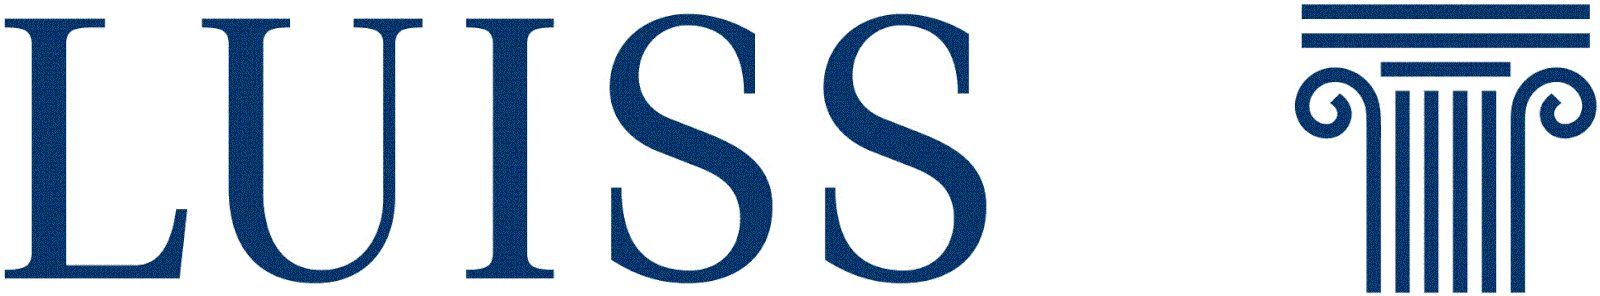
## Managment and Computer Science
### Course: Algorithms 2022-2023
**Laboratory Lecture 10/03/2023 - Merge Sort**

Contacts:<br/>
Irene Finocchi, Flavio Giorgi, Bardh Prenkaj <br/>
*finocchi@luiss.it, fgiorgi@luiss.it, bprenkaj@luiss.it*

### How to use the file:

#### - Remember that in order to run a function you have to call it, the declaration is not enough.
#### - If you declared an import or a variable in a cell and you need it in another cell you have to run the cell where you put the declaration otherwise python will give you an exception!


In [1]:
import time
import random
import matplotlib.pyplot as plt

random.seed(42)

maximum = 1000000

"""
We declare three lists: 
    - the first one is in ascending order
    - the second one has no order
    - the tirdh one is in descending order
"""

# ordered list
ascending_order_list = [i for i in range(maximum)]

# random order list
random_shuffle_list = [i for i in range(maximum)]
random.shuffle(random_shuffle_list)

# inverese order
descending_order_list = [i for i in range(maximum)]
descending_order_list.reverse()


***Just to visualize the values in the lists***. <br/> On the x-axis there are the ***list indices***, on the y-axis there are the ***values*** for each index.<br/> The correct order is the dotted line in red. The purple line represent the list in descending order, the blue dots instead represent the random order list

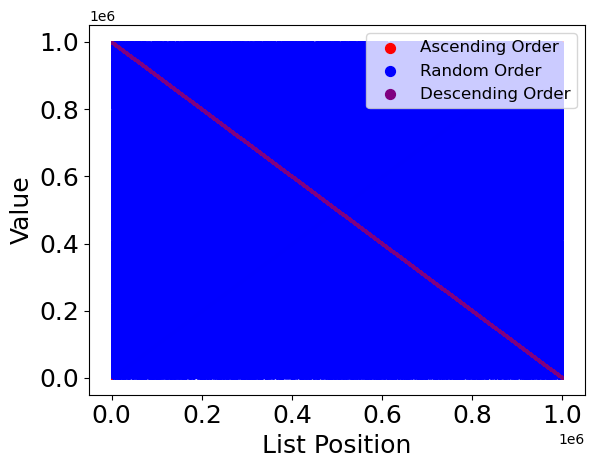

In [2]:
"""
Run this cell to visualize the content of the lists
"""

x = [i for i in range(maximum)]

plt.scatter(x, ascending_order_list, c="red", s=0.5, label="Ascending Order")
plt.scatter(x, random_shuffle_list, c="blue", s=0.5, label="Random Order")
plt.scatter(x, descending_order_list, c="purple", s=0.5, label="Descending Order")

plt.xlabel("List Position", fontsize=18)
plt.ylabel("Value", fontsize=18)

plt.legend(loc="upper right", fontsize="large", markerscale=10)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Recursive Merge Sort
Implement here the recursive version of merge sort, run the algorithm with all the lists above and see how long it takes to sort them.

In [7]:
def recursive_mergesort(A: list) -> list:
    """
    Sort the input array A in place, using the Merge Sort algorithm 
    """
    if len(A) > 1:
 
        mid = len(A)//2
        sub_array1 = A[:mid]
        sub_array2 = A[mid:]
 
        recursive_mergesort(sub_array1)
        recursive_mergesort(sub_array2)
        
        # From here start the merge procedure
                 
        i = j = k = 0
 
        while i < len(sub_array1) and j < len(sub_array2):
            if sub_array1[i] < sub_array2[j]:
                A[k] = sub_array1[i]
                i += 1
            else:
                A[k] = sub_array2[j]
                j += 1
            k += 1
            
        # From here you offload the remaining values in the vectors
 
        while i < len(sub_array1):
            A[k] = sub_array1[i]
            i += 1
            k += 1
 
        while j < len(sub_array2):
            A[k] = sub_array2[j]
            j += 1
            k += 1
                    
    return A


### After the algorithm implementation measure how long it takes to sort the lists running the cell below

In [8]:
tic = time.time()
A = recursive_mergesort(random_shuffle_list.copy())
toc = time.time()
print(toc-tic)

5.37662410736084


# Iterative Merge Sort



In [5]:
def iterative_mergesort(A: list):
    """
    Iterative merge sort
    """
    # width represent the sub list len
    width = 1    
    list_length = len(A)                                          
    
    while (width < list_length):
        
        # We start fixing the left point as the beginning of
        # the list
        left = 0
        
        while (left < list_length): 
            
            # These checks are needed to avoid that the
            # index goes out of range, in fact we have that 
            # First of all we compute the right point adding to the 
            # left point 2 times the current width of the sub lists
            # that goes from 0, 1, 2, 4, 8, etc... as a power of 2
            # then we subtract 1 from it because of list indexing in python
            
            right = min(left + (width * 2 - 1), list_length - 1)  
            
            # We compute also the mid point
            middle = min(left + width - 1, list_length - 1)
            
            # Then the merge procedure starts joining the two sub lists
            # into a single ordered list
            merge(A, left, middle, right)
            
            left += width*2

        width *= 2
        
    return A

    
# Merge Function 
def merge(A: list, left: int, middle: int, right: int): 
    """
    Merge procedure to join two lists in linear time
    """
    
    L = A[left: middle + 1]
    R = A[middle: right]
      
    i, j, k = 0, 0, left 
    
    while i < len(L) and j < len(R):
        
        if L[i] <= R[j]: 
            A[k] = L[i] 
            i += 1
        else: 
            A[k] = R[j] 
            j += 1
        k += 1
  
    while i < len(L): 
        A[k] = L[i] 
        i += 1
        k += 1
  
    while j < len(R): 
        A[k] = R[j] 
        
        j += 1
        k += 1

In [6]:
tic = time.time()
A = iterative_mergesort(random_shuffle_list.copy())
toc = time.time()
print(toc-tic)

5.5994837284088135


## Exercise - Medium:
Using the most efficient implementation of the bubble sort, make a compare between bubble sort, merge sort and the sort function in pyhton for and increasing number of elements. Start from a list with 500000 elements up to 10000000 and plot the results

In [ ]:
# Implement here your solution